In [1474]:
#import ax as ax
from copy import deepcopy

import numpy as np
import math as math
import scipy as sc
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn as sk
from sklearn.impute import SimpleImputer, KNNImputer

# Fáza 1 - prieskumná analýza

Pomer práce 50% - 50%

Autori: Jakub Smorada, Adrian Szacsko

## 1. Základný opis dát spolu s ich charakteristikami (5 bodov)

Z načítaného datasetu sme odstránili indexy, pretože nám ich knižnica pandas pridá sama.

In [1475]:
from matplotlib import pyplot
sns.set_theme(style="dark", palette="rocket")
dataset = pd.read_csv("042/labor.csv", delimiter="\t")
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,no,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,no,6.61722,divoced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Diane Dunn,NaN,no,8.84155,married,410-38-6674,2.32670,165.53795,8.77005,88.36972,56.40210,28.48174,7.23321,6.44218,6.13313,0.0,6.33770
3,Debra Cameron,8.52161,Y,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
4,Vincent Mccullough,4.35962,no,6.61320,divoced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,Kenneth Sanchez,4.67432,N,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
10035,Jennifer Franklin,5.38144,Y,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
10036,Valerie Carter,3.16568,Y,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
10037,Julie Newman,4.80303,Y,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


### Počet záznamov a počet atribútov:

Pomocou funkcie len() sme sa dozvedeli koľko máme záznamov a atribútov. Záznamov je 10039 a atribútov je 17. 

In [1476]:
profiles = len(dataset.index)
attributes = len(dataset.columns)
data = [[profiles], [attributes]]
sum_of_dataset = pd.DataFrame(data, columns = ['Number'], index = ['Profiles','Attributes'])
sum_of_dataset.style

,Number
Profiles,10039
Attributes,17


### Typy dát:
Jednotlivé typy dát sú viditeľné v nasledujúcej tabuľke.

In [1477]:
info = pd.DataFrame(dataset.dtypes)
info = info.set_axis(['Dtype'], axis=1, inplace=False)
info.style


,Dtype
name,object
hematokrit,float64
smoker,object
leukocyty,float64
relationship,object
ssn,object
alt,float64
weight,float64
erytrocyty,float64
alp,float64


### Distribúcia významných atribútov:

Pomocou knižnice pandas sme vytvorili rôzne histogramy pre niekoľko významných atribútov, napr. **hematokrit, leukocyty, alt, weight, erytrocyty, alp,
ast, er-cv, etytr, hemoglobin, trombocyty, indicator, hbver**


array([[<AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'indicator'}>],
       [<AxesSubplot:title={'center':'hbver'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

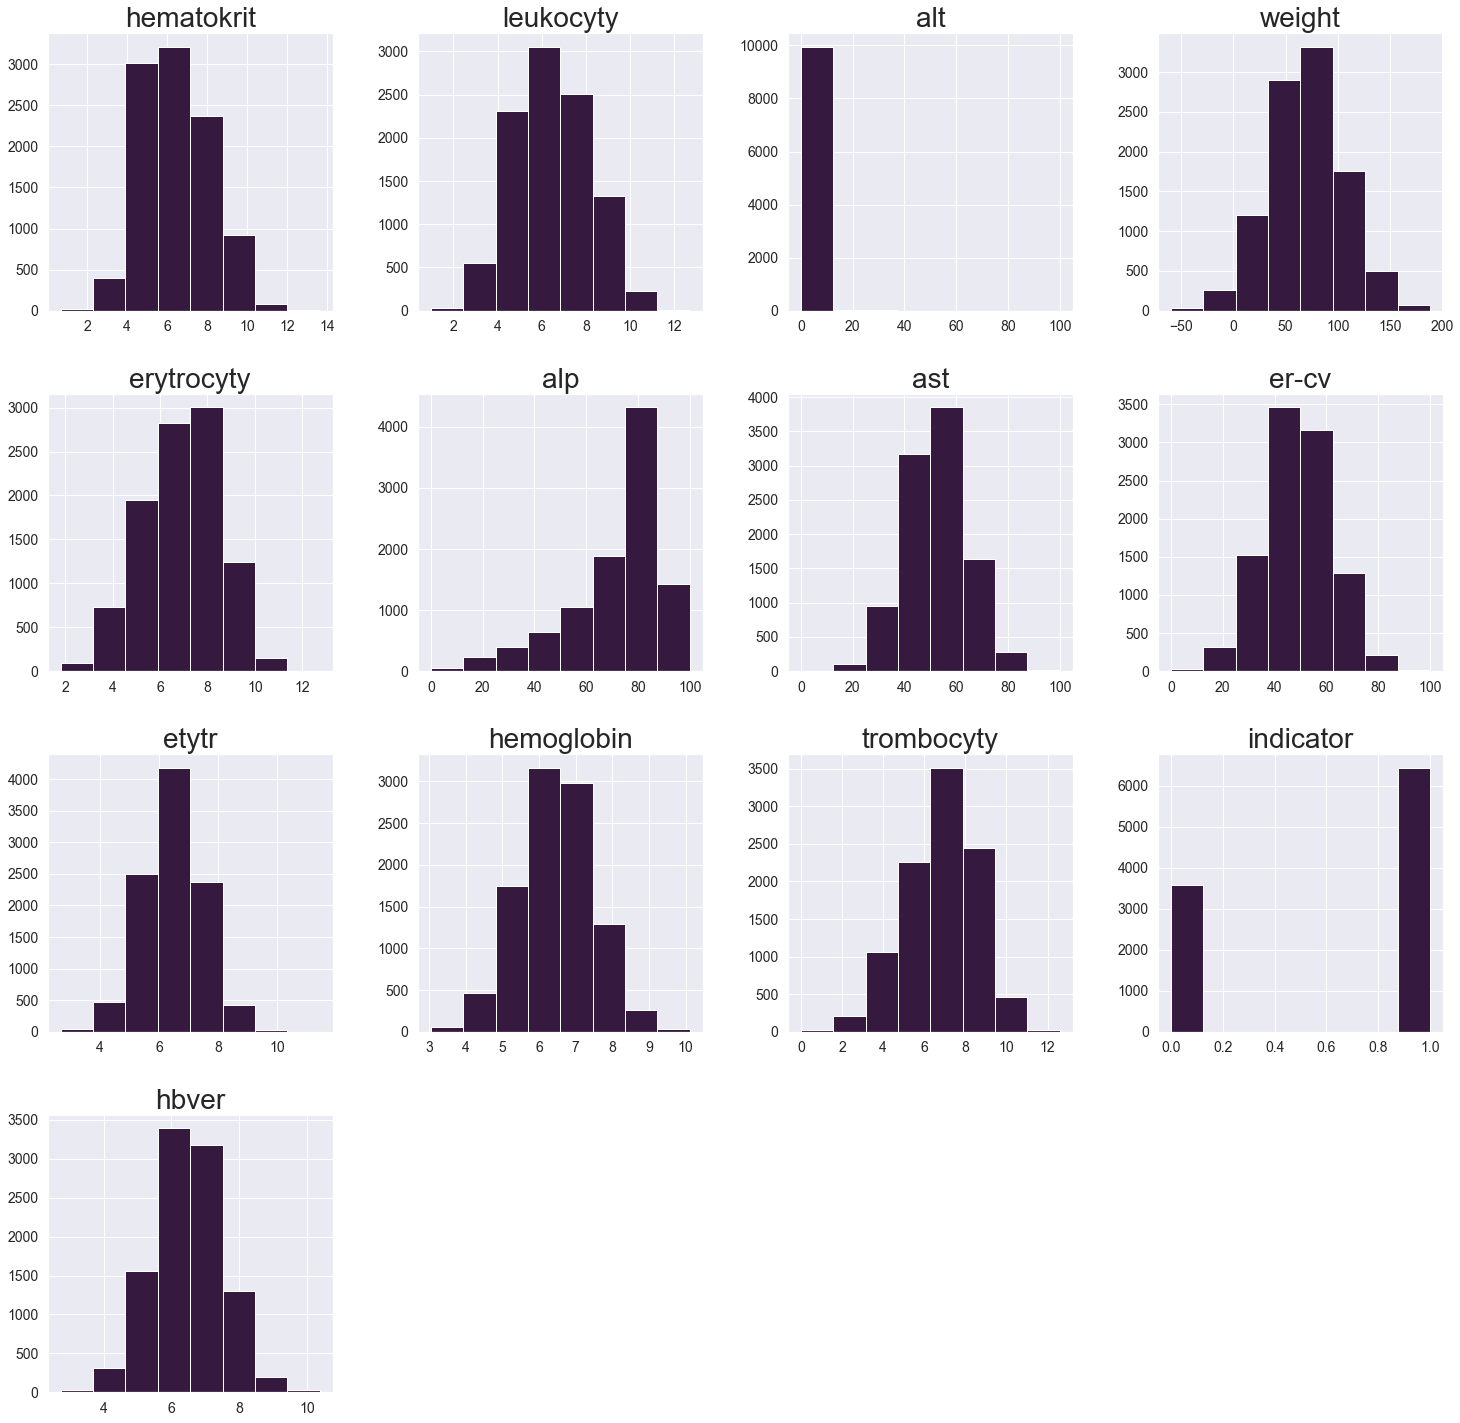

In [1478]:
# dataset.head()
fig = dataset.hist(bins=8, figsize=[25, 25], xlabelsize=14, ylabelsize=14)
[x.title.set_size(28) for x in fig.ravel()]
fig

### Základné deskriptívne štatistiky

K základný deskriptívnym štatistikám patria: **medián, modus, priemer, smerodajná odchýlka, minimálna
a maximálna hodnota, variancia, atď.**

*Vypočítanie modusu nemá význam, pretože jednotlivé záznamy sú unikátne (nevyskytujú sa viackrát).*

In [1479]:
desc_stat_table = dataset.select_dtypes(include=[np.float64])
desc_stat = dataset.describe()
desc_stat.loc['median'] = desc_stat_table.median()
desc_stat.loc['variance'] = desc_stat_table.var()
# modus nie je mozne urobit, su unikátne
desc_stat.style


,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000,10008.000000,10009.000000,10009.000000,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000
mean,6.453032,6.450274,1.306090,69.805192,6.898802,71.949719,52.343359,49.060376,6.476717,6.464414,6.828460,0.642295,6.475601
std,1.665991,1.700428,2.080683,35.581044,1.605785,18.109229,11.880597,13.084279,0.994156,1.006072,1.734330,0.479349,1.004527
min,0.683890,0.979140,0.000000,-59.892790,1.811270,0.000000,0.000000,0.000000,2.678710,3.054200,0.000000,0.000000,2.738210
25%,5.197180,5.177990,0.521560,46.183730,5.748830,63.818647,44.490180,40.393810,5.802672,5.786020,5.665190,0.000000,5.806840
50%,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.002890,1.000000,6.478430
75%,7.669982,7.693890,1.344220,93.175640,8.052080,84.986902,60.275100,57.766910,7.147997,7.140870,8.078720,1.000000,7.147590
max,13.633550,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.595220,1.000000,10.361820
median,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.002890,1.000000,6.478430
variance,2.775527,2.891457,4.329243,1266.010690,2.578547,327.944181,141.148595,171.198357,0.988347,1.012181,3.007899,0.229775,1.009075


Pre nami zvolené atribúty sme vykreslili ich distribúcie ako aj opísali ich základné deskriptívne štatistiky.

#### Hematokrit

count       10008.000000
mean            6.453032
std             1.665991
min             0.683890
25%             5.197180
50%             6.227605
75%             7.669982
max            13.633550
median          6.227605
variance        2.775527
Name: hematokrit, dtype: float64

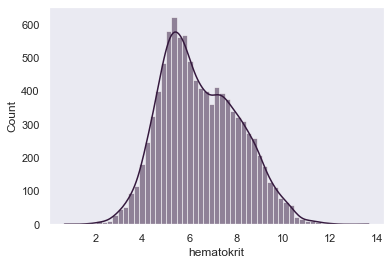

In [1480]:
sns.histplot(data=dataset["hematokrit"], kde=True)
desc_stat["hematokrit"]

### Leukocyty

count       10009.000000
mean            6.450274
std             1.700428
min             0.979140
25%             5.177990
50%             6.352150
75%             7.693890
max            12.694630
median          6.352150
variance        2.891457
Name: leukocyty, dtype: float64

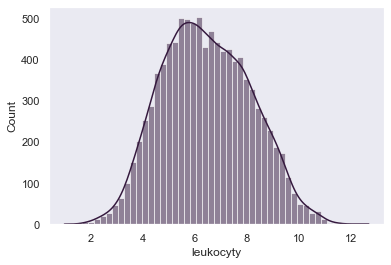

In [1481]:
sns.histplot(data=dataset["leukocyty"], kde=True)
desc_stat["leukocyty"]

### Alt

count       10009.000000
mean            1.306090
std             2.080683
min             0.000000
25%             0.521560
50%             0.773820
75%             1.344220
max           100.000000
median          0.773820
variance        4.329243
Name: alt, dtype: float64

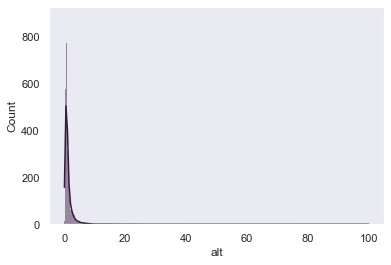

In [1482]:
sns.histplot(data=dataset["alt"], kde=True)
desc_stat["alt"]

### Alp

count       10008.000000
mean           71.949719
std            18.109229
min             0.000000
25%            63.818647
50%            78.203065
75%            84.986902
max           100.000000
median         78.203065
variance      327.944181
Name: alp, dtype: float64

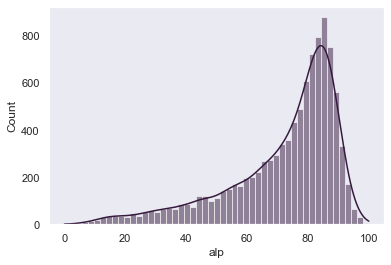

In [1483]:
sns.histplot(data=dataset["alp"], kde=True)
desc_stat["alp"]

### Trombocyty

count       10009.000000
mean            6.828460
std             1.734330
min             0.000000
25%             5.665190
50%             7.002890
75%             8.078720
max            12.595220
median          7.002890
variance        3.007899
Name: trombocyty, dtype: float64

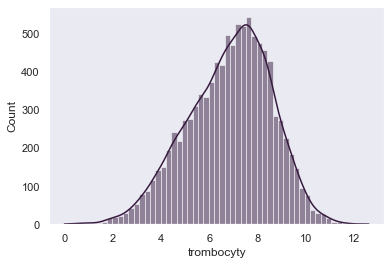

In [1484]:
sns.histplot(data=dataset["trombocyty"], kde=True)
desc_stat["trombocyty"]

##  2. Párová analýza dát

V tejto sekcii sme preskúmali koreláciu medzi jednotlivými atribútami pomocou funkcie matshow() z knižnice matplotlib.
Ako je možné vidieť, najvyššia pozitívna korelácia je medzi atribútom **'indicator'** a atribútom **'trombocyty'**.
Druhá najvyššia pozitívna korelácia je medzi atribútom **'etrocyty'** a atribútom **'alt'**.
Najvyššia negatívna korelácia je medzi atribútom **'erytrocyty'** a atribútom **'hematokrit'**.

,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
hematokrit,1.000000,-0.035522,-0.189589,-0.001973,-0.465486,0.016232,-0.005173,0.005333,0.002552,-0.015807,-0.035439,-0.000303,0.010663
leukocyty,-0.035522,1.000000,0.168388,-0.013297,0.325243,0.006254,0.008797,-0.003789,0.001818,0.002873,0.152565,0.003806,-0.027663
alt,-0.189589,0.168388,1.000000,-0.008129,0.562912,0.003450,-0.000498,-0.004342,0.004709,0.000778,-0.249282,-0.088956,-0.016101
weight,-0.001973,-0.013297,-0.008129,1.000000,0.005316,0.008733,0.018511,0.005936,0.006945,-0.000762,0.001160,-0.000745,0.002998
erytrocyty,-0.465486,0.325243,0.562912,0.005316,1.000000,0.004859,0.004136,0.007379,0.005965,0.014648,-0.339868,-0.324942,-0.009878
alp,0.016232,0.006254,0.003450,0.008733,0.004859,1.000000,0.000184,-0.010546,0.000059,-0.222828,0.006122,0.009448,-0.004786
ast,-0.005173,0.008797,-0.000498,0.018511,0.004136,0.000184,1.000000,-0.010656,-0.011953,0.007756,0.009759,-0.005213,0.011179
er-cv,0.005333,-0.003789,-0.004342,0.005936,0.007379,-0.010546,-0.010656,1.000000,-0.002173,0.007510,-0.002161,0.002313,0.001687
etytr,0.002552,0.001818,0.004709,0.006945,0.005965,0.000059,-0.011953,-0.002173,1.000000,0.000625,-0.008126,-0.012031,0.000659
hemoglobin,-0.015807,0.002873,0.000778,-0.000762,0.014648,-0.222828,0.007756,0.007510,0.000625,1.000000,-0.000889,0.007017,0.003178


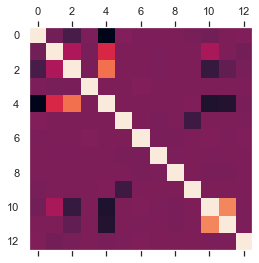

In [1485]:
correllation = dataset.corr()
mt.pyplot.matshow(correllation)
correllation.style.background_gradient(cmap='coolwarm')

### Závislosti medzi dvojicami atribútov:

#### Alt a Erytrocyty

Z korelácie vieme vyčítať, že atribút **'alt'** a atribút **'erytrocyty'** majú súvislosť **0.56**, čo znamená,
že môžeme skúsiť vytvoriť graf, aby sme sa dozvedeli viac.

<AxesSubplot:xlabel='alt', ylabel='erytrocyty'>

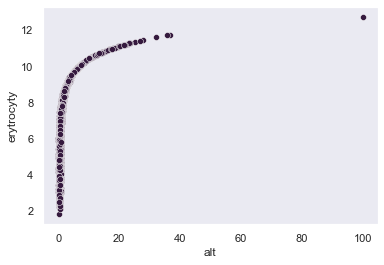

In [1486]:
sns.scatterplot(data=dataset, x='alt', y='erytrocyty', )
# .set(xscale="log", yscale="log")

Z grafu sme sa dozvedeli, že čím väčšia je hodnota **'alt'**, tým väčšia je hodnota **'erytrocyty'**.
Závislosť atribútu **'erytrocyty'** od atribútu **'alt'** má **logaritmickú** krivku.


#### Leukocyty a Erytrocyty

Podľa tabuľky korelácii vieme, že aj atribút **'erytrocyty'** a atribút **'leukocyty'** majú nejakú súvislosť. Tieto dva atribúty majú koreláciu **0.33**.

<AxesSubplot:xlabel='erytrocyty', ylabel='leukocyty'>

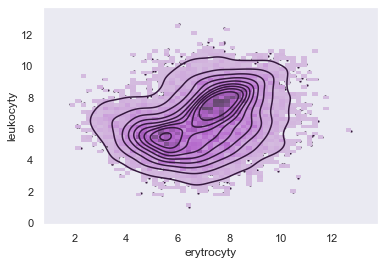

In [1487]:
sns.scatterplot(data=dataset, x='erytrocyty', y='leukocyty',s=6)
sns.histplot(data=dataset, x='erytrocyty', y='leukocyty')
sns.kdeplot(data=dataset, x='erytrocyty', y='leukocyty')
#sns.jointplot(data=dataset, x='erytrocyty', y='leukocyty')



Z grafu vieme vyčítať, že najväčší počet erytrocytov a leukocytov sa nachádza medzi hodnotou 6 a 8.

#### Erytrocyty a Hematokrit

Atribút **'erytrocyty'** a atribút **'hematokrit'** majú **negatívnú** koreláciu. Ich korelácia je **-0.47**.

<AxesSubplot:xlabel='erytrocyty', ylabel='hematokrit'>

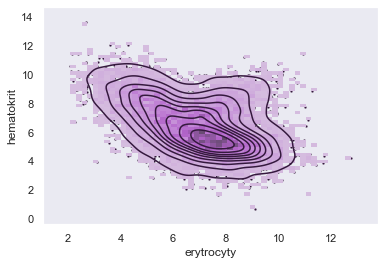

In [1488]:
sns.scatterplot(data=dataset, x='erytrocyty', y='hematokrit',s=6)
sns.histplot(data=dataset, x='erytrocyty', y='hematokrit')
sns.kdeplot(data=dataset, x='erytrocyty', y='hematokrit')

Tuná vidíme, že erytrocyty sú najčastejšie medzi hodnotami 6 a 8, pokiaľ je hematokrit medzi hodnotou 4 a 6.

#### Trombocyty a Alt

Korelácia medzi atribútom **'trombocyty'** a atribútom **'alt'** je **-0.25**.

<AxesSubplot:xlabel='trombocyty', ylabel='alt'>

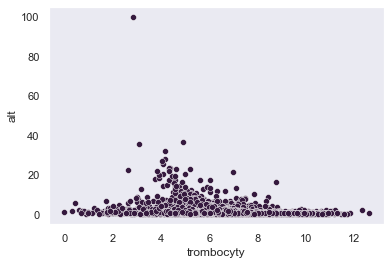

In [1489]:
sns.scatterplot(data=dataset, x='trombocyty', y='alt')

Z grafu môžeme vidieť, že ak je alt medzi hodnotou 20 a 40, tak sa trombocyty nachádzajú medzi hodnotami 4 a 6.

#### Trombocyty a Erytrocyty

Medzi atribútom **'trombocyty'** a atribútom **'erytrocyty'** je taktiež negatívna korelácia **-0.34**.

<AxesSubplot:xlabel='trombocyty', ylabel='erytrocyty'>

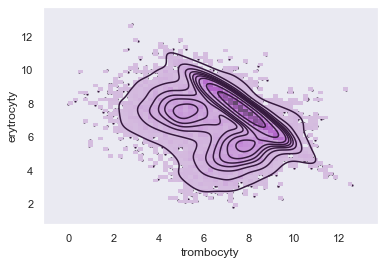

In [1490]:
sns.scatterplot(data=dataset, x='trombocyty', y='erytrocyty',s=6)
sns.histplot(data=dataset, x='trombocyty', y='erytrocyty')
sns.kdeplot(data=dataset, x='trombocyty', y='erytrocyty')

Vidíme, že počet trombocytov a erytrocytov sa najčastejšie nachádza medzi hodontami 6 a 8.

### Závislosti medzi predikovanou premennou a ostatnými premennými

#### Indicator a Trombocyty

Korelácia medzi atribútom **'indicator'** a atribútom **'trombocyty'** je **najvyššia pozitívna** z uvedených dvojíc. Táto korelácia dosahuje hodnotu **0.63**.

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

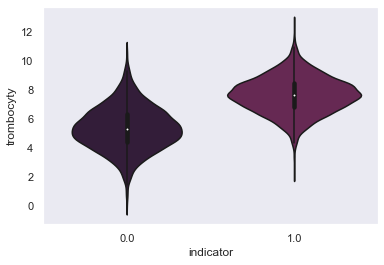

In [1491]:
sns.violinplot(data=dataset, x='indicator', y='trombocyty')
#dataset.head()


Pomocou grafu typu violinplot môžeme vidieť, že čím vyššie sú trombocyty, tým vyšší je indicator.
Z tejto korelácie nám môže vyplývať, že vyššie trombocyty znamenajú horší stav pacienta s leukémiou.

#### Indicator a Erytrocyty

Korelácia medzi atribútmu **'indicator'** a **'erytrocyty'** je **najvyššia negatívna** korelácia medzi predikovanou premennou a inou premennou.
Táto korelácia dosahuje hodnotu **-0.32**.

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

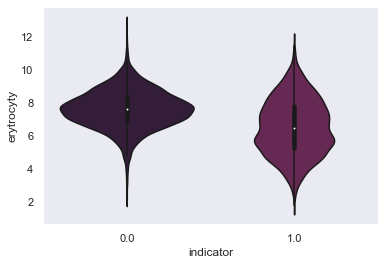

In [1492]:
sns.violinplot(data=dataset, x='indicator', y='erytrocyty')

Podľa grafu violinplot vidíme, že pacienti s horším stavom majú menšie množstvo erytrocytov ako pacienti v lepšom stave.

## 3. Formulácia a štatistické overenie hypotéz o dátach

Hypotéza 1:

H0 - Pacientov stav nesúvisi s fajčením

H1 - Pacienti, ktorí fajčia majú horší stav leukémie

Hypotéza 2:

H0 - Počet trombocytov u pacienta nesúvisi s jeho stavom

H1 - Pacienti, ktorí majú vyšší počet trombocytov majú horší stav leukémie

### Hypotéza 1:

V stĺpci "smoker" musíme zmeniť hodnoty tak, aby boli jednotné. Pre toto sme si spravili slovník replacement_dict.
Hodnoty "Y" a "yes" vymeníme za hodnotu 1, zatiaľčo hodnoty "N" a "no" vymeníme za hodnotu 0.

In [1493]:
smoker_series = dataset['smoker']
replacement_dict = {
    "Y": 1,
    "yes": 1,
    "N": 0,
    "no": 0
}
dataset["smoker"].replace(replacement_dict, inplace=True)
smokers = dataset.loc[(dataset["smoker"] == 1), "indicator"]
non_smokers = dataset.loc[(dataset["smoker"] == 0), "indicator"]


Kolačový graf pre podiel fajčiarov a nefajčiarov:

([<matplotlib.patches.Wedge at 0x17890b0d6d0>,
 [Text(-1.137903295731835, 0.3810198020610325, 'smokers'),
  Text(1.137903295731835, -0.3810198020610326, 'non smokers')],
 [Text(-0.6637769225102369, 0.22226155120226893, '40%'),
  Text(0.6637769225102369, -0.222261551202269, '60%')])

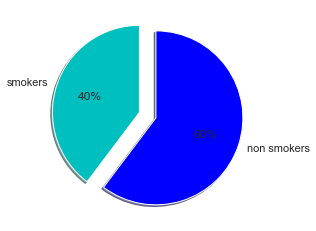

In [1494]:
plt.pie([len(smokers), len(non_smokers)], labels = ["smokers","non smokers"], colors = ['c','b'], startangle = 90, shadow = True, explode = (0.1, 0.1), autopct='%1.0f%%')

In [1495]:
print("Počet fajčiarov:",smokers.count())
print("Počet nefajčiarov:",non_smokers.count())

Počet fajčiarov: 3987
Počet nefajčiarov: 6052


Vidíme, že počet nefajčiarov je väčší ako počet fajčiarov. Aby sme mali čo najpresnejšiu štatistiku, potrebujeme zobrať (približne) rovnakú vzorku pre obe distribúcie. Preto z datasetu nefajčiari zoberieme len takú veľku vzorku ako je počet fajčiarov. Toto zabezpečíme pomocou funkcie sample() z knižnice pandas. Funkcia sample nám vyberie náhodnú vzorku z datasetu o špecifikovanej veľkosti. Táto vzorka je náhodná a tým pádom bude p hodnota pri rôznych testoch stále trochu iná. To nám ale v konečnom prípade nijak nebude vadiť, pretože výsledok testu bude stále rovnaký.

In [1496]:
non_smokers = non_smokers.sample(smokers.count())
non_smokers.count()

3987

Teraz máme rovnaký počet subjektov v oboch vzorkách.

#### Zistenie normálovej distribúcie:

In [1497]:
shapiro_test = sc.stats.shapiro(smokers)

if sc.stats.shapiro(smokers).pvalue > 0.05 and sc.stats.shapiro(non_smokers).pvalue > 0.05:
    print("Je to normálova distribúcia")
else:
    print("Nie je to normálova distribúcia")

Nie je to normálova distribúcia


Shapirov test nám ukázal, že distribúcia nie je normálova.

Teraz je potrebné zistiť, či distribúcia je párovaná alebo nepárovaná. To znamená, či sa 2 alebo viaceré skupiny skladajú z rovnakých testovacích subjektov. Keďže sme si pacientov rozdelili na tých, čo fajčia a tých čo nefajčia, znamená to, že testovacia distribúcia je nepárovaná.

Máme nenormálovu, nepárovanú distribúciu 2 skupín a teda spravíme Man-Whitneyho U test.

#### Mann-Whitney U test:

In [1498]:
whitney = sc.stats.mannwhitneyu(smokers,non_smokers)
print("Pvalue hodnota po vykonaní testu Mann-Whitney U: ",whitney.pvalue)

if whitney.pvalue > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Pvalue hodnota po vykonaní testu Mann-Whitney U:  0.8518127250201488
Same distribution (fail to reject H0)


Z Mann-Whitneyho U testu sme dostali p hodnotu väčšiu ako 0.05 -> nevieme potvrdiť hypotézu (fail to reject H0).

### Hypotéza 2:


Pre druhú hypotézu si rozdelíme dataset na pacientov s indikátorom 0 a pacientov s indikátorom 1. Pri týchto pacientoch nás bude zaujímať ich hodnota atribútu trombocyty.

In [1499]:
trombocyty_zero = dataset.loc[(dataset["indicator"] == 0), "trombocyty"]
trombocyty_zero = trombocyty_zero.dropna()
trombocyty_one = dataset.loc[(dataset["indicator"] == 1), "trombocyty"]
trombocyty_one = trombocyty_one.dropna()

Kolačový graf pre rozdelenie pacientov s indikátorom 0 a pacientov s indikátorom 1:

([<matplotlib.patches.Wedge at 0x1788ab92fd0>,
 [Text(-1.0823620862308192, 0.5181624400610961, 'patients with indicator 0'),
  Text(1.0823620862308192, -0.5181624400610962, 'patients with indicator 1')],
 [Text(-0.6313778836346444, 0.30226142336897266, '36%'),
  Text(0.6313778836346444, -0.30226142336897277, '64%')])

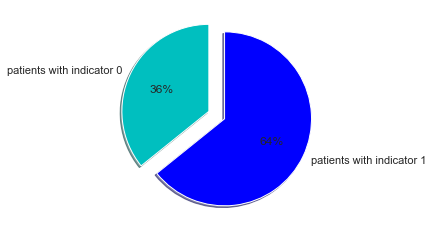

In [1500]:
plt.pie([len(trombocyty_zero), len(trombocyty_one)], labels = ["patients with indicator 0","patients with indicator 1"], colors = ['c','b'], startangle = 90, shadow = True, explode = (0.1, 0.1), autopct='%1.0f%%')

In [1501]:
print("Počet pacientov s indikátorom 0:",trombocyty_zero.count())
print("Počet pacientov s indikátorom 1:",trombocyty_one.count())

Počet pacientov s indikátorom 0: 3582
Počet pacientov s indikátorom 1: 6427


Aj tuná musíme zmenšiť vzorku pre distribúciu trombocyty_one.

In [1502]:
trombocyty_one = trombocyty_one.sample(trombocyty_zero.count())
trombocyty_one.count()

3582

Teraz máme v oboch vzorkách rovnaký počet subjektov.

#### Zistenie normálovej distribúcie:

In [1503]:
if sc.stats.shapiro(trombocyty_zero).pvalue > 0.05 and sc.stats.shapiro(trombocyty_one).pvalue > 0.05:
    print("Je to normálova distribúcia")
else:
    print("Nie je to normálova distribúcia")

Nie je to normálova distribúcia


Zo shapirovho testu sme zistili, že daná distribúcia nie je normálova.

Pacientov sme si rozdelili na 2 skupiny, tých s indikátorom 0 a tých s indikátorom 1. To znamená, že táto distribúcia je nepárovaná.

Máme nenormálovu, nepárovanú distribúciu 2 skupín a teda spravíme Man-Whitneyho U test.

#### Mann-Whitney U test:

In [1504]:
if sc.stats.mannwhitneyu(trombocyty_zero, trombocyty_one).pvalue > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


Po vykonaní Man-Whitneyho U testu môžeme zamietnuť hypotézu H0. Z toho nám vyplýva, že hypotéza H1 je správna.

## 4. Identifikácia problémov v dátach s navrhnutým riešením

V datasete, s ktorým sme doteraz pracovali sú nejaké chyby (chýbajúce hodnoty, vychýlené hodnoty, nejednotné formáty, atď.). Zistíme počet chybných riadkov, v ktorých chýba aspoň jedna hodnota.

In [1505]:
dataset.isna().sum()

name             0
hematokrit      31
smoker           0
leukocyty       30
relationship     0
ssn              0
alt             30
weight           0
erytrocyty      30
alp             31
ast             30
er-cv           30
etytr           31
hemoglobin      30
trombocyty      30
indicator        0
hbver           30
dtype: int64

Riadky, ktoré obsahujú nekompletné údaje môžeme odstrániť.

Následne si zistíme unikátne záznamy v jednotlivých stĺpcoch. Pre číselné záznamy nepotrebujeme zisťovať unikátne záznamy.

In [1506]:
for column in dataset.columns:
    if dataset[column].dtypes == 'object':
        print("{}:".format(column), "\n", dataset[column].unique(),"\n")
    

name: 
 ['Courtney Sparks' 'David Cook' 'Diane Dunn' ... 'Andrea Torres'
 'April Butler' 'Wendy Cole'] 

relationship: 
 ['married' 'divoced' 'separated' 'nop' 'single' 'widowed'] 

ssn: 
 ['211-15-5030' '134-25-6459' '410-38-6674' ... '115-96-1449' '476-98-5349'
 '055-26-1339'] 



Ako môžeme vidieť, pri menách a SSN nám taktiež nezáleží na unikátnych záznamoch. Kde nám ale záleží na unikátnych záznamoch je stĺpec relationship. Vidíme, že obsahuje 6 unikátnych záznamov. Tieto záznamy majú nejaké gramatické chyby, preto ich upravíme (napr. "divoced" -> "divorced", "nop" -> "not specified").

Teraz sa pozrime na druhý dataset.

In [1507]:
dataprofiles = pd.read_csv("042/profiles.csv", delimiter="\t")
dataprofiles

,Unnamed: 0,blood_group,company,job,ssn,sex,birthdate,race,name,address
0,0,A-,Yu Group,"Engineer, energy",383-82-1198,M,"08/10/1946, 00:00:00",White,John Beard,"2896 Juan Manor\nNorth Douglasmouth, LA 50163"
1,1,O-,"Chase, Brown and Price","Designer, furniture",828-02-1024,M,1933/01/31,Black,Dustin Oneal,"225 Moore Glen Suite 019\nAmandastad, WA 64166"
2,2,O+,"Martinez, Medina and Myers",Medical technical officer,604-55-3198,F,1989-11-29,Hawaiian,Rachel Brown,"51910 Timothy Lane\nHorneburgh, DE 96504"
3,3,O-,Odonnell-Weber,Neurosurgeon,235-52-1947,M,"10/07/1975, 00:00:00",Black,Robert Johnson,5654 Kimberly Points Suite 971\nSouth Robinshi...
4,4,O-,Velazquez Ltd,Homeopath,160-55-3346,F,"06/16/1934, 00:00:00",White,Stephanie Rodriguez,"25985 Kyle Terrace\nPamelaland, CA 64245"
...,...,...,...,...,...,...,...,...,...,...
3055,3055,O-,"Ramirez, Chambers and Lee",Multimedia specialist,129-93-9411,M,2010/08/23,Black,Adam Owens,"798 Brown Centers\nWest Kristin, AL 16008"
3056,3056,O-,"Bennett, Porter and Diaz","Nurse, learning disability",073-31-8151,F,"03/15/2013, 00:00:00",Black,Pamela Tapia MD,"328 Sanchez River Suite 664\nSolishaven, CA 16716"
3057,3057,O-,Ward Group,Town planner,496-75-4226,F,"07/28/1916, 00:00:00",Black,Crystal Anderson,Unit 0796 Box 7005\nDPO AA 92880
3058,3058,O+,Jenkins-Turner,"Administrator, arts",895-70-8728,F,1928-02-29,Asian,Emily Walker,"574 James Crossroad Suite 057\nDeanfort, WY 09541"


Skúsme zistiť, či sa v ňom nachádzajú nejaké duplikátne záznamy. Každý človek má pridelené unikátne SSN (social security number) a preto hľadáme duplikátne SSN.

In [1508]:
data_test = dataprofiles.drop_duplicates(subset="ssn")
print("Duplikátne riadky: ",dataprofiles["ssn"].count() - data_test["ssn"].count())

Duplikátne riadky:  0


Zistili sme, že v danom datasete sa nenachádzajú žiadne duplikátne záznamy.

V datasete sa nachádzajú rôzne formáty dátumu narodenia. To by sme mali upraviť na jednotný formát.

In [1509]:
dataprofiles['birthdate']

0       08/10/1946, 00:00:00
1                 1933/01/31
2                 1989-11-29
3       10/07/1975, 00:00:00
4       06/16/1934, 00:00:00
                ...         
3055              2010/08/23
3056    03/15/2013, 00:00:00
3057    07/28/1916, 00:00:00
3058              1928-02-29
3059              1913-04-26
Name: birthdate, Length: 3060, dtype: object

Takisto sa tam nachádzajú nejednotné údaje pre rasu. Môžeme si všimnúť, že pre jednu rasu sa v datasete nachádzajú viaceré hodnoty (napr. black, Black, blsck). To môžeme upraviť na jednu hodnotu.

In [1510]:
dataprofiles["race"].unique()

array(['White', 'Black', 'Hawaiian', 'Indian', 'Asian', 'white', 'black',
       'blsck'], dtype=object)

Teraz zistíme vychýlené hodnoty.

Počet vychýlených hodnôt pre jednotlivé stĺpce vypíšeme. Najviac vychýlených hodnôt sme našli v stĺcoch **Alp** a **Alt**.
Tieto vychýlené hodnoty neskôr vymeníme pomocou funkcie Winsorize.

In [1511]:
def check_for_outliers(data, column_name: str):
    # calculate summary statistics
    data_mean, data_std = np.mean(data), np.std(data)

    # define outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    # identify outliers
    length = len(column_name)
    column_name += " outliers"
    column_name += ' '*(10-length)
    outliers = [x for x in data if x < lower or x > upper]
    print(column_name.capitalize()+': %d' % len(outliers))

In [1512]:
for column in dataset.describe().columns:
    check_for_outliers(dataset[column], column)


Hematokrit outliers: 14
Smoker outliers    : 0
Leukocyty outliers : 5
Alt outliers       : 123
Weight outliers    : 21
Erytrocyty outliers: 3
Alp outliers       : 150
Ast outliers       : 29
Er-cv outliers     : 27
Etytr outliers     : 35
Hemoglobin outliers: 31
Trombocyty outliers: 21
Indicator outliers : 0
Hbver outliers     : 37


<AxesSubplot:xlabel='weight', ylabel='Count'>

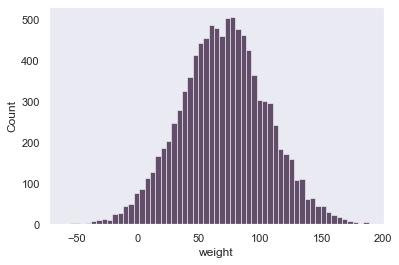

In [1513]:
sns.histplot(dataset["weight"])

Z tohto grafu môžeme vidieť, že v datasete sa nachádzajú záznamy o váhe s negatívnou hodnotou. To je samozrejme hlúposť a musíme s tým niečo spraviť. Zistíme si koľko takých vychýlených hodnôt v datasete existuje.

Vytvoríme si slovník weight_dict, kde sú minimálne a maximálne váhy pre mužov a ženy. Podľa tohto slovníku zistíme koľko vychýlených hodnôt máme v datasete pre mužov a pre ženy.

In [1514]:
weight_dict = {
    "Male_min": 43,
    "Male_max": 100,
    "Female_min": 41,
    "Female_max": 90
}
# zdroj pre tieto hodnoty: https://www.healthifyme.com/blog/height-weight-chart-ideal-weight-for-men-and-women/

In [1515]:
counter_m = 0
counter_n = 0
for i in range(len(dataset["weight"])):
    index_in_profiles = pd.Index(dataprofiles["ssn"]).get_loc(dataset["ssn"][i])
    get_sex = dataprofiles["sex"][index_in_profiles]
    if get_sex == 'M':
        if not (weight_dict["Male_min"] < dataset["weight"][i] < weight_dict["Male_max"] ):
            counter_m += 1
    else:
        if not (weight_dict["Female_min"] < dataset["weight"][i] < weight_dict["Female_max"] ):
            counter_n += 1

print("Počet vychýlených hodnôt pre mužov:", counter_m)
print("Počet vychýlených hodnôt pre žien:", counter_n)

Počet vychýlených hodnôt pre mužov: 2103
Počet vychýlených hodnôt pre žien: 2443


Neskôr možeme tieto hodnoty vymeniť za iné hodnoty (náhodne vygenerované hodnoty z rozsahu Male_mix po Male_max resp. Female_min po Female_max).

V časti **"Formulácia a štatistické overenie hypotéz o dátach"** sme našli nevhodnú štruktúru dát. V stĺpci "smoker" sme vymenili typ údajov na číselné hodnoty, kde 1 reprezentuje, že daný pacient fajčí a 0, že daný pacient nefajčí.

smoker_series = dataset['smoker']

replacement_dict = {
    "Y": 1,
    "yes": 1,
    "N": 0,
    "no": 0
}

dataset["smoker"].replace(replacement_dict, inplace=True)


# Fáza 2

Z fázy 1 sme presunuli odstránenie a výmenu vychýlených hodnôt do fázy 2


## 1. Integrácia a čistenie dát


### Skúšanie rôznych stratégií pre vyriešenie problému chýbajúcich hodnôt

#### Odstránenie pozorovaní s chýbajúcimi údajmi

Teraz pristúpime k odstráneniu chýbajúcich hodnôt.

In [1516]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10039 non-null  object 
 1   hematokrit    10008 non-null  float64
 2   smoker        10039 non-null  int64  
 3   leukocyty     10009 non-null  float64
 4   relationship  10039 non-null  object 
 5   ssn           10039 non-null  object 
 6   alt           10009 non-null  float64
 7   weight        10039 non-null  float64
 8   erytrocyty    10009 non-null  float64
 9   alp           10008 non-null  float64
 10  ast           10009 non-null  float64
 11  er-cv         10009 non-null  float64
 12  etytr         10008 non-null  float64
 13  hemoglobin    10009 non-null  float64
 14  trombocyty    10009 non-null  float64
 15  indicator     10039 non-null  float64
 16  hbver         10009 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [1517]:
dataset.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9713 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9713 non-null   object 
 1   hematokrit    9713 non-null   float64
 2   smoker        9713 non-null   int64  
 3   leukocyty     9713 non-null   float64
 4   relationship  9713 non-null   object 
 5   ssn           9713 non-null   object 
 6   alt           9713 non-null   float64
 7   weight        9713 non-null   float64
 8   erytrocyty    9713 non-null   float64
 9   alp           9713 non-null   float64
 10  ast           9713 non-null   float64
 11  er-cv         9713 non-null   float64
 12  etytr         9713 non-null   float64
 13  hemoglobin    9713 non-null   float64
 14  trombocyty    9713 non-null   float64
 15  indicator     9713 non-null   float64
 16  hbver         9713 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


Po použití funkcie **dropna()** vidíme, že počet záznamov v každom stĺpci je jednotný.

#### Nahradenie chýbajúcej hodnoty mediánom

In [1518]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10039 non-null  object 
 1   hematokrit    10008 non-null  float64
 2   smoker        10039 non-null  int64  
 3   leukocyty     10009 non-null  float64
 4   relationship  10039 non-null  object 
 5   ssn           10039 non-null  object 
 6   alt           10009 non-null  float64
 7   weight        10039 non-null  float64
 8   erytrocyty    10009 non-null  float64
 9   alp           10008 non-null  float64
 10  ast           10009 non-null  float64
 11  er-cv         10009 non-null  float64
 12  etytr         10008 non-null  float64
 13  hemoglobin    10009 non-null  float64
 14  trombocyty    10009 non-null  float64
 15  indicator     10039 non-null  float64
 16  hbver         10009 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [1519]:
temp_dataset = dataset[dataset.describe().columns]
imp=SimpleImputer(missing_values=np.NaN, strategy='median')
dataset_median=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_median.columns=temp_dataset.columns
dataset_median.index=temp_dataset.index

In [1520]:
dataset_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hematokrit  10039 non-null  float64
 1   smoker      10039 non-null  float64
 2   leukocyty   10039 non-null  float64
 3   alt         10039 non-null  float64
 4   weight      10039 non-null  float64
 5   erytrocyty  10039 non-null  float64
 6   alp         10039 non-null  float64
 7   ast         10039 non-null  float64
 8   er-cv       10039 non-null  float64
 9   etytr       10039 non-null  float64
 10  hemoglobin  10039 non-null  float64
 11  trombocyty  10039 non-null  float64
 12  indicator   10039 non-null  float64
 13  hbver       10039 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


#### Nahradenie chýbajúcej hodnoty priemerom

In [1521]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10039 non-null  object 
 1   hematokrit    10008 non-null  float64
 2   smoker        10039 non-null  int64  
 3   leukocyty     10009 non-null  float64
 4   relationship  10039 non-null  object 
 5   ssn           10039 non-null  object 
 6   alt           10009 non-null  float64
 7   weight        10039 non-null  float64
 8   erytrocyty    10009 non-null  float64
 9   alp           10008 non-null  float64
 10  ast           10009 non-null  float64
 11  er-cv         10009 non-null  float64
 12  etytr         10008 non-null  float64
 13  hemoglobin    10009 non-null  float64
 14  trombocyty    10009 non-null  float64
 15  indicator     10039 non-null  float64
 16  hbver         10009 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [1522]:
temp_dataset = dataset[dataset.describe().columns]
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
dataset_mean=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_mean.columns=temp_dataset.columns
dataset_mean.index=temp_dataset.index

In [1523]:
dataset_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hematokrit  10039 non-null  float64
 1   smoker      10039 non-null  float64
 2   leukocyty   10039 non-null  float64
 3   alt         10039 non-null  float64
 4   weight      10039 non-null  float64
 5   erytrocyty  10039 non-null  float64
 6   alp         10039 non-null  float64
 7   ast         10039 non-null  float64
 8   er-cv       10039 non-null  float64
 9   etytr       10039 non-null  float64
 10  hemoglobin  10039 non-null  float64
 11  trombocyty  10039 non-null  float64
 12  indicator   10039 non-null  float64
 13  hbver       10039 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


#### Nahradenie chýbajúcej hodnoty pomerom

In [1524]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10039 non-null  object 
 1   hematokrit    10008 non-null  float64
 2   smoker        10039 non-null  int64  
 3   leukocyty     10009 non-null  float64
 4   relationship  10039 non-null  object 
 5   ssn           10039 non-null  object 
 6   alt           10009 non-null  float64
 7   weight        10039 non-null  float64
 8   erytrocyty    10009 non-null  float64
 9   alp           10008 non-null  float64
 10  ast           10009 non-null  float64
 11  er-cv         10009 non-null  float64
 12  etytr         10008 non-null  float64
 13  hemoglobin    10009 non-null  float64
 14  trombocyty    10009 non-null  float64
 15  indicator     10039 non-null  float64
 16  hbver         10009 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [1525]:
temp_dataset = dataset[dataset.describe().columns]
imp=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
dataset_most_frequent=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_most_frequent.columns=temp_dataset.columns
dataset_most_frequent.index=temp_dataset.index

In [1526]:
dataset_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hematokrit  10039 non-null  float64
 1   smoker      10039 non-null  float64
 2   leukocyty   10039 non-null  float64
 3   alt         10039 non-null  float64
 4   weight      10039 non-null  float64
 5   erytrocyty  10039 non-null  float64
 6   alp         10039 non-null  float64
 7   ast         10039 non-null  float64
 8   er-cv       10039 non-null  float64
 9   etytr       10039 non-null  float64
 10  hemoglobin  10039 non-null  float64
 11  trombocyty  10039 non-null  float64
 12  indicator   10039 non-null  float64
 13  hbver       10039 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


#### Nahradenie chýbajúcej hodnoty pomocou lineárnej regresie

In [1527]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10039 non-null  object 
 1   hematokrit    10008 non-null  float64
 2   smoker        10039 non-null  int64  
 3   leukocyty     10009 non-null  float64
 4   relationship  10039 non-null  object 
 5   ssn           10039 non-null  object 
 6   alt           10009 non-null  float64
 7   weight        10039 non-null  float64
 8   erytrocyty    10009 non-null  float64
 9   alp           10008 non-null  float64
 10  ast           10009 non-null  float64
 11  er-cv         10009 non-null  float64
 12  etytr         10008 non-null  float64
 13  hemoglobin    10009 non-null  float64
 14  trombocyty    10009 non-null  float64
 15  indicator     10039 non-null  float64
 16  hbver         10009 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [1528]:
temp_dataset = dataset[dataset.describe().columns]
imp=KNNImputer()
dataset_knn=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_knn.columns=temp_dataset.columns
dataset_knn.index=temp_dataset.index

In [1529]:
dataset_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hematokrit  10039 non-null  float64
 1   smoker      10039 non-null  float64
 2   leukocyty   10039 non-null  float64
 3   alt         10039 non-null  float64
 4   weight      10039 non-null  float64
 5   erytrocyty  10039 non-null  float64
 6   alp         10039 non-null  float64
 7   ast         10039 non-null  float64
 8   er-cv       10039 non-null  float64
 9   etytr       10039 non-null  float64
 10  hemoglobin  10039 non-null  float64
 11  trombocyty  10039 non-null  float64
 12  indicator   10039 non-null  float64
 13  hbver       10039 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


Z datasetu sme odstránili záznamy, ktoré nemajú všetky atribúty (nachádza sa tam NaN). Vymenili sme chybné dáta (tam kde boli nejaké preklepy) a resetovali sme indexy celého datasetu.

In [1530]:
dataset = dataset.dropna()

dataset["relationship"].replace("divoced","divorced",inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset["relationship"].replace("nop","not specified",inplace=True)
dataset

C:\Users\szacs\PycharmProjects\IAU\venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,0,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,0,6.61722,divorced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Debra Cameron,8.52161,1,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
3,Vincent Mccullough,4.35962,0,6.61320,divorced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
4,Lauren Harris,5.32524,1,6.52586,divorced,755-50-6094,0.89996,57.01768,7.78640,80.50126,44.08776,60.41555,5.33112,6.68497,7.49621,1.0,6.88636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,0,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
9709,Jennifer Franklin,5.38144,1,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
9710,Valerie Carter,3.16568,1,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
9711,Julie Newman,4.80303,1,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


In [1531]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9713 non-null   object 
 1   hematokrit    9713 non-null   float64
 2   smoker        9713 non-null   int64  
 3   leukocyty     9713 non-null   float64
 4   relationship  9713 non-null   object 
 5   ssn           9713 non-null   object 
 6   alt           9713 non-null   float64
 7   weight        9713 non-null   float64
 8   erytrocyty    9713 non-null   float64
 9   alp           9713 non-null   float64
 10  ast           9713 non-null   float64
 11  er-cv         9713 non-null   float64
 12  etytr         9713 non-null   float64
 13  hemoglobin    9713 non-null   float64
 14  trombocyty    9713 non-null   float64
 15  indicator     9713 non-null   float64
 16  hbver         9713 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


Teraz môžeme vidieť, že v každom stĺpci je jednotný počet záznamov. 

Začíname pracovať aj s druhým datasetom, v ktorom máme profily jednotlivých pacientov. Aj tu urobíme menšie úpravy preto, aby sme s dátami vedeli pracovať lepšie.

Z tohto datasetu sme odstránili duplikáty. Okrem duplikátov sme odstránili aj také záznamy, v ktorých neboli všetky informácie. Vymenili sme chybné stringy a zmazali prvý stĺpec, kde sme mali indexy záznamov, nakoľko nám to pandas sám pridá.

In [1532]:
# Second dataset

dataprofiles = pd.read_csv("042/profiles.csv", delimiter="\t")
dataprofiles.drop(dataprofiles.columns[0], axis=1, inplace=True)
dataprofiles.drop_duplicates(subset="ssn", inplace=True)
dataprofiles['birthdate'] = pd.to_datetime(dataprofiles['birthdate'])
dataprofiles.dropna(inplace=True)
dataprofiles.replace({"black":"Black","blsck":"Black","white":"White"}, inplace=True)

Vypíšeme si unikátne záznamy zo stĺpca **blood_group** na overenie:

In [1533]:
print(dataprofiles['blood_group'].unique())

['A-' 'O-' 'O+' 'A+' 'AB+' 'B-' 'AB-' 'B+']


Následne odstránime vychýlené hodnoty z jednotlivých stĺpcov.


#### Ako funguje Winsorize:

Funkcia winsorize nám nahradí vychýlené hodnoty maximálnými a minimálnymi hodnotami z distribúcie.
Najprv sa rozhodnime, koľko údajov chceme zmeniť. Toto je uvedené ako percento nedotknutých údajov.

Napríklad, ak chceme chceme zmeniť horných 5% a dolných 5% údajov,
rovná sa to 100% – 5% – 5% = 90%. 80% winsorizácia znamená, že 10% údajov je
upravených z hornej aj dolnej časti distribúcie.


Napríklad:
Nasledujúci súbor údajov má niekoľko (tučným písmom) extrémov:

{**0.1, 1**, 12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **99, 125**}

Priemer = 33,405.

Po úprave horných a spodných 10 % (tieto hodnoty som priradil k najbližšiemu extrému):

{**12, 12**,12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **44, 44**}

80 %-ná winsorizácia:

Priemer = 24,95.


In [1534]:
old_dataset = dataset.copy()
temp_data = dataset.describe()
for col in temp_data.columns:
    if col != 'smoker' and col != 'weight':
        dataset[col] = sc.stats.mstats.winsorize(dataset[col], limits=[0.01,0.01])

C:\Users\szacs\AppData\Local\Temp/ipykernel_56816/3492335155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = sc.stats.mstats.winsorize(dataset[col], limits=[0.01,0.01])


Porovnajme hodnoty pred a po odstánení vychýlených hodnôt:

In [1535]:
print("--------------------------------------Old dataset-------------------------------------------")
old_dataset.describe()

--------------------------------------Old dataset-------------------------------------------


,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000
mean,6.454299,0.396891,6.444636,1.303361,69.800152,6.895542,71.939889,52.350348,49.063033,6.476735,6.466178,6.831330,0.643056,6.475720
std,1.666199,0.489278,1.699504,2.081240,35.583137,1.604197,18.107966,11.882088,13.088834,0.993437,1.005856,1.736495,0.479123,1.003433
min,0.683890,0.000000,0.979140,0.000000,-59.892790,2.099090,2.744180,0.000000,0.000000,2.678710,3.054200,0.000000,0.000000,2.738210
25%,5.201070,0.000000,5.178020,0.519960,46.192270,5.740240,63.755840,44.490800,40.408550,5.802460,5.791640,5.664670,0.000000,5.809340
50%,6.224930,0.000000,6.343710,0.773170,70.065660,7.027840,78.218470,52.405390,48.902580,6.478210,6.476760,7.004410,1.000000,6.481100
75%,7.673260,1.000000,7.688520,1.343610,93.195840,8.047400,84.983790,60.275100,57.773530,7.148050,7.142670,8.082540,1.000000,7.145560
max,13.633550,1.000000,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.595220,1.000000,10.361820


In [1536]:
print("--------------------------------------New dataset-------------------------------------------")
dataset.describe()

--------------------------------------New dataset-------------------------------------------


,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9713.00000,9713.000000,9713.000000
mean,6.453451,0.396891,6.444236,1.234314,69.800152,6.893932,71.962870,52.341747,49.060710,6.476307,6.465285,6.83334,0.643056,6.474922
std,1.643655,0.489278,1.678938,1.326499,35.583137,1.582764,17.963322,11.653258,12.862982,0.974253,0.987455,1.70745,0.479123,0.983526
min,3.172690,0.000000,2.918660,0.201580,-59.892790,3.201190,15.065690,24.636000,17.885140,4.118420,4.115530,2.61082,0.000000,4.154610
25%,5.201070,0.000000,5.178020,0.519960,46.192270,5.740240,63.755840,44.490800,40.408550,5.802460,5.791640,5.66467,0.000000,5.809340
50%,6.224930,0.000000,6.343710,0.773170,70.065660,7.027840,78.218470,52.405390,48.902580,6.478210,6.476760,7.00441,1.000000,6.481100
75%,7.673260,1.000000,7.688520,1.343610,93.195840,8.047400,84.983790,60.275100,57.773530,7.148050,7.142670,8.08254,1.000000,7.145560
max,10.345960,1.000000,10.286970,8.151220,188.436090,10.172930,94.246460,80.402660,80.127480,8.789140,8.787740,10.36089,1.000000,8.823100


Môžeme vidieť, že sa nám zmenili maximálne a minimálne hodnoty. Pred úpravou mali dáta väčší rozsah (v stĺpci hematokrit bolo minimum 0,68 a maximum 13,63). Po úprave majú dáta menší rozsah (v stĺpci hematokrit je minimum 3,17 a maximum 10,34). Zatiaľ čo sa nám zmenil rozsah (minimum a maximum), táto zmena nijak signifikantne neovplyvnila priemer dát.

Porovnajme hodnoty v stĺpci **Hematokrit** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

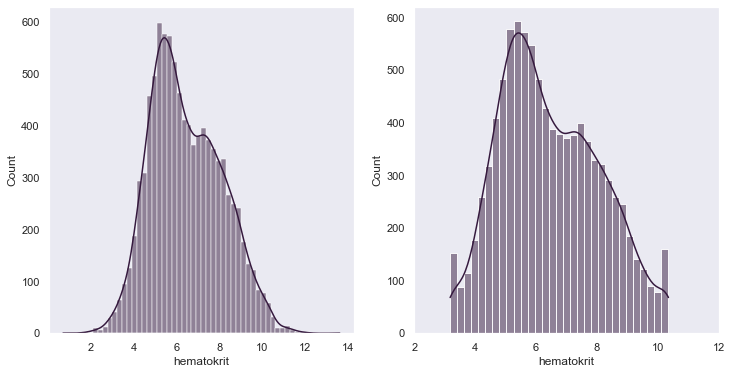

In [1537]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["hematokrit"],ax=ax[0], kde=True)
sns.histplot(data=dataset["hematokrit"], ax=ax[1], kde=True)
plt.axis([2,12,0,620])

Ako bolo spomenuté vyššie, priemer dát sa nijak signifikantne nezmenil. Jediné čo sa zmenilo je rozsah dát.

Porovnajme hodnoty v stĺpci **Leukocyty** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

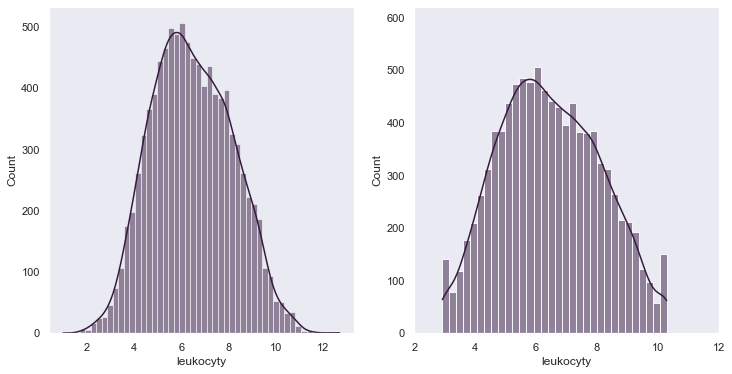

In [1538]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["leukocyty"],ax=ax[0], kde=True)
sns.histplot(data=dataset["leukocyty"], ax=ax[1], kde=True)
plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Alt** pred a po odstánení vychýlených hodnôt:

<AxesSubplot:xlabel='alt', ylabel='Count'>

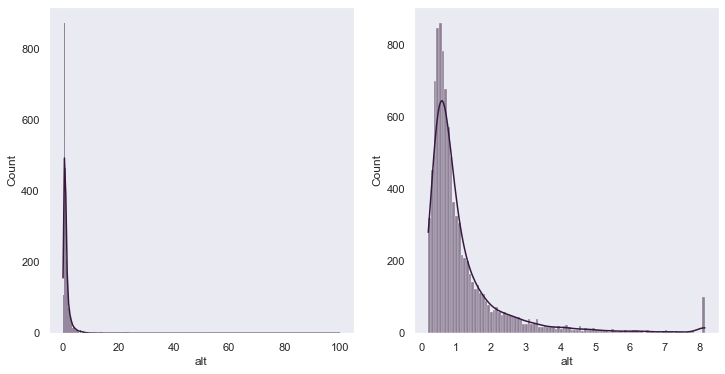

In [1539]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["alt"],ax=ax[0], kde=True)
sns.histplot(data=dataset["alt"], ax=ax[1], kde=True)
#plt.axis([2,12,0,620])

Ako môžeme vidieť funkcia winsorize znovu upravila rozsah dát. Atribút **alt** mal predtým rozsah od 0 po 100, zatiaľčo pri hodnote 0 až 8 bolo týchto záznamov najviac.

Porovnajme hodnoty v stĺpci **Erytrocyty** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

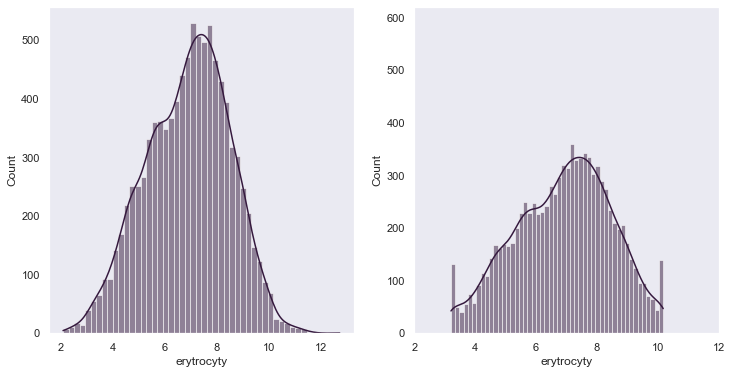

In [1540]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["erytrocyty"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["erytrocyty"], ax=ax[1], bins=50, kde=True)
plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Alp** pred a po odstánení vychýlených hodnôt:

<AxesSubplot:xlabel='alp', ylabel='Count'>

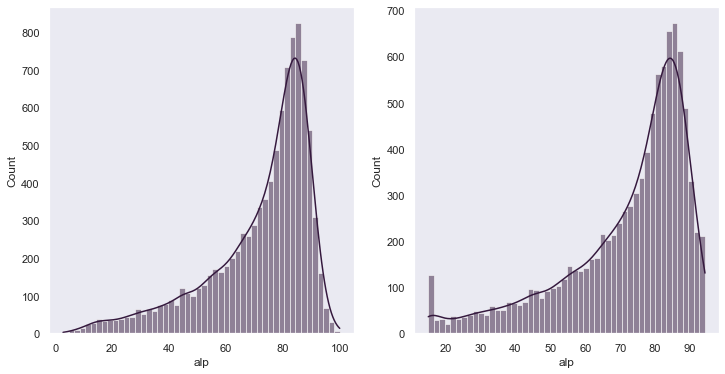

In [1541]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["alp"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["alp"], ax=ax[1], bins=50, kde=True)
#plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Ast** pred a po odstánení vychýlených hodnôt:

<AxesSubplot:xlabel='ast', ylabel='Count'>

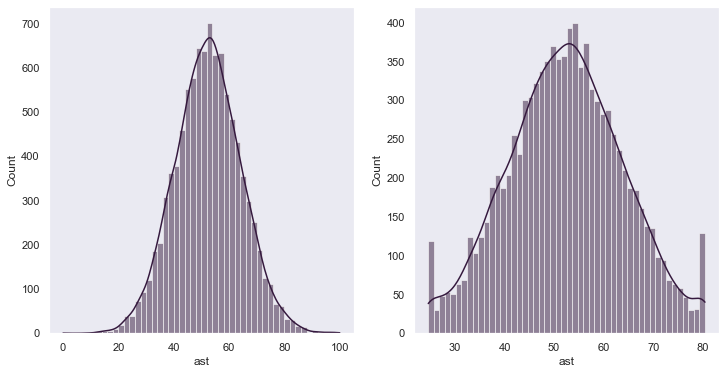

In [1542]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["ast"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["ast"], ax=ax[1], bins=50, kde=True)
#plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Er-cv** pred a po odstánení vychýlených hodnôt:

<AxesSubplot:xlabel='er-cv', ylabel='Count'>

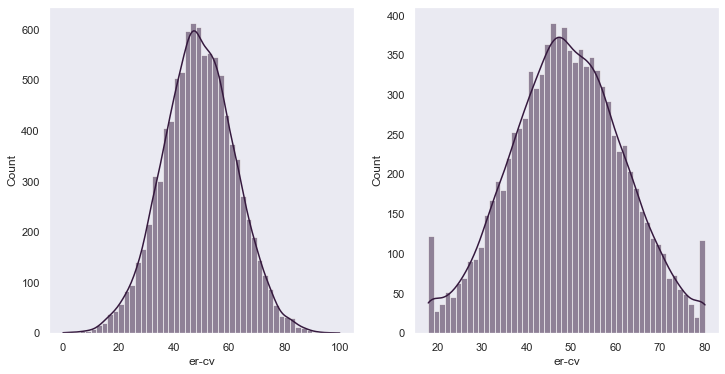

In [1543]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["er-cv"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["er-cv"], ax=ax[1], bins=50, kde=True)
#plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Etytr** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

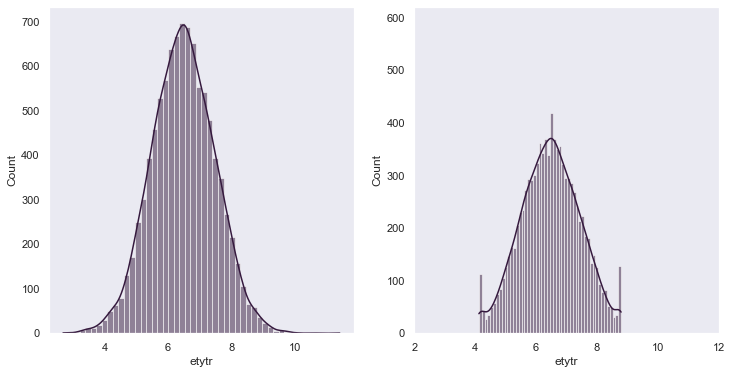

In [1544]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["etytr"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["etytr"], ax=ax[1], bins=50, kde=True)
plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Hemoglobin** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

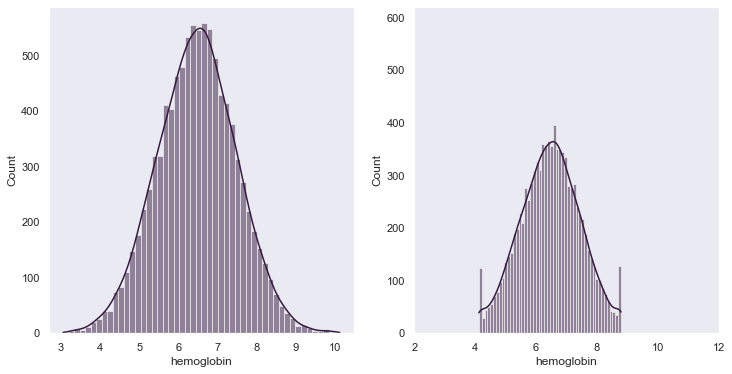

In [1545]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["hemoglobin"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["hemoglobin"], ax=ax[1], bins=50, kde=True)
plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Trombocyty** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

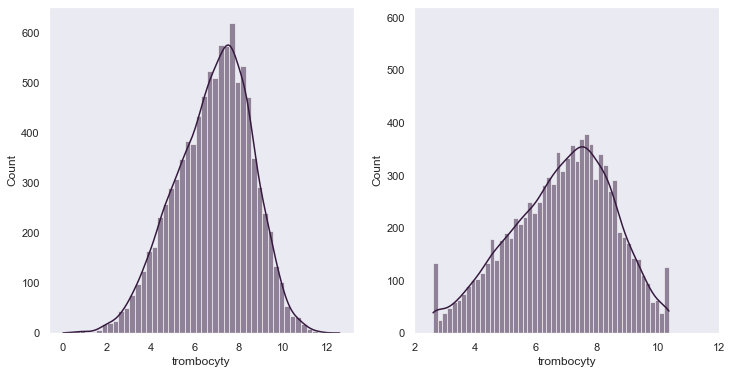

In [1546]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["trombocyty"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["trombocyty"], ax=ax[1], bins=50, kde=True)
plt.axis([2,12,0,620])


Porovnajme hodnoty v stĺpci **Hbver** pred a po odstánení vychýlených hodnôt:

(2.0, 12.0, 0.0, 620.0)

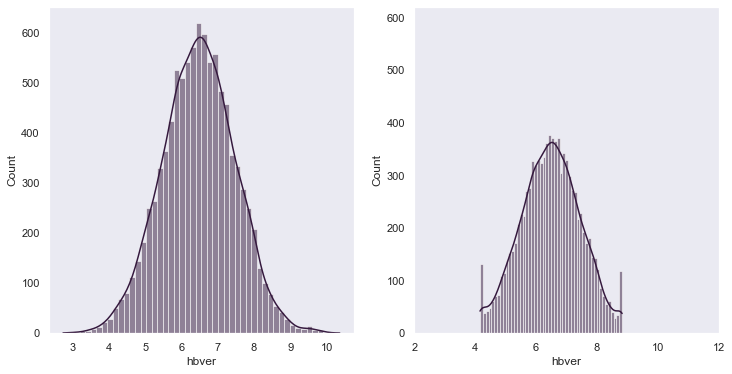

In [1547]:
fig, ax=mt.pyplot.subplots(1,2, figsize=(12,6))
sns.histplot(data=old_dataset["hbver"],ax=ax[0], bins=50, kde=True)
sns.histplot(data=dataset["hbver"], ax=ax[1], bins=50, kde=True)
plt.axis([2,12,0,620])

Ako si môžeme všimnúť tak informácie o váhe sú niekedy veľmi chybné. Preto je potrebné ich upraviť.

In [1548]:
dataset["weight"].describe()

count    9713.000000
mean       69.800152
std        35.583137
min       -59.892790
25%        46.192270
50%        70.065660
75%        93.195840
max       188.436090
Name: weight, dtype: float64

Zistíme približný počet koľko je v datasete v stĺpci "weight" vychýlených hodnôt.

In [1549]:
dataset['weight'].describe()
counter=0
for i in dataset['weight']:
    if i<=35:
        counter+=1
        #print(i, end=" ")

print("Počet vychýlených hodnôt:", counter)

Počet vychýlených hodnôt: 1572


Zostrojme si graf, ktorý nám povie viac o hodnotách v stĺpci "weight".

<AxesSubplot:xlabel='weight', ylabel='Density'>

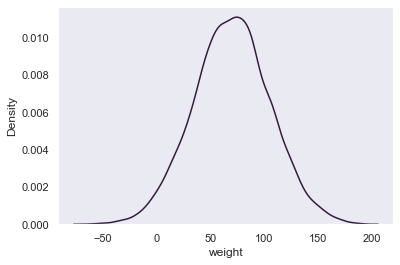

In [1550]:
sns.kdeplot(data=dataset['weight'])

Skúsme aplikovať funkciu winsorize na vychýlené hodnoty v stĺpci "weight".

<AxesSubplot:ylabel='Density'>

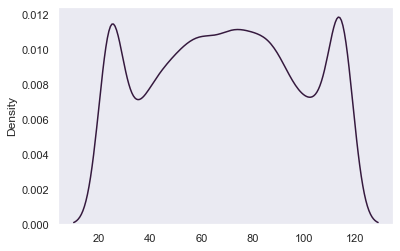

In [1551]:
sns.kdeplot(data=sc.stats.mstats.winsorize(dataset['weight'], limits=[0.1,0.1]))

Ako z grafu vidíme, winsorize nám kvôli negatívnym a vychýleným hodnotám nepomôže.

Čo teda môžeme spraviť je, že odstraníme všetky vychýlené hodnoty v stĺpci weight a nahradíme ich priemernými hodnotami váhy pre mužov a ženy.

Pohlavie daného pacienta môžeme získať z profiles.csv.

Napíšeme algoritmus, ktorý vymení všetky vychýlené hodnoty za náhodné hodnoty z intervalu, ktorý je určená podľa pohlavia daného pacienta.

Pomocou funkcie random.normal z knižnice NumPy si vygenerujeme náhodnú normálovu distribúciu hodnôt od Male_min po Male_max resp. Female_min po Female_max. Následne nájdeme vychýlené hodnoty, ktoré vymeníme za náhodne vybranú hodnotu z poľa male_normal resp. female_normal.

In [1552]:
weight_dict = {
    "Male_min": 43,
    "Male_max": 100,
    "Female_min": 41,
    "Female_max": 90
}
# zdroj pre tieto hodnoty: https://www.healthifyme.com/blog/height-weight-chart-ideal-weight-for-men-and-women/

In [1553]:
male_array = [weight_dict["Male_min"], weight_dict["Male_max"]]
female_array = [weight_dict["Female_min"], weight_dict["Female_max"]]

male_normal = np.random.normal(np.mean(male_array), np.std(male_array)/3.4, 1000)
female_normal = np.random.normal(np.mean(female_array), np.std(female_array)/3.4, 1000)

for i in range(len(dataset["weight"])):
    index_in_profiles = pd.Index(dataprofiles["ssn"]).get_loc(dataset["ssn"][i])
    
    get_sex = dataprofiles["sex"][index_in_profiles]

    if get_sex == 'M':
        if not (weight_dict["Male_min"] < dataset["weight"][i] < weight_dict["Male_max"] ):
            weight = male_normal[np.random.randint(1000)]
            dataset["weight"][i] = weight
    else:
        if not (weight_dict["Female_min"] < dataset["weight"][i] < weight_dict["Female_max"] ):
            weight = female_normal[np.random.randint(1000)]
            dataset["weight"][i] = weight


C:\Users\szacs\AppData\Local\Temp/ipykernel_56816/1847745184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["weight"][i] = weight
C:\Users\szacs\AppData\Local\Temp/ipykernel_56816/1847745184.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["weight"][i] = weight


Vykreslíme graf, kde už sú jednotlivé hodnoty vymenené.

Podľa grafu môžeme vidieť, že váhy pacientov sú už reálne hodnoty. Všetky negatívne a
príliš malé alebo prílíš veľké hodnoty boli odstránené.

<AxesSubplot:xlabel='weight', ylabel='Count'>

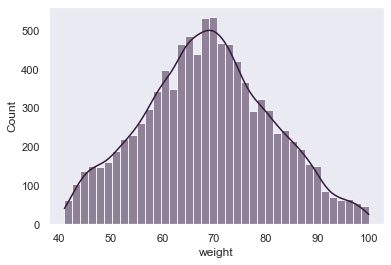

In [1554]:
# sns.kdeplot(data=dataset['weight'])
sns.histplot(data=dataset["weight"], kde=True)